# IEEE Fraud Detection

# Content :
* Data exploration:
 + Missing Data.( Solved by drop missing column and replace with -999 value)
 + Imbalanced target data.(Solved by: Undersampling/Oversampling)
* Plots : 
 + Distribution plots
 + Count plots
 + Unique values
 + Groups
* Memory reduction

* Models:
 + Logistic regression
 + Neural Network and improved versions of NNR( L1,L2, Regulaziation, normalization, add momentum, weighted class...)

* Data exploration:Train and test are Time series split. Therefore, the train and test data is not duplicated.

# Transaction Table:

# Identity Table:

# Importing Required Libraries

In [1]:
import sys
!{sys.executable} -m pip install seaborn
import seaborn
!{sys.executable} -m pip install sklearn
import sklearn
!{sys.executable} -m pip install matplotlib
import matplotlib
!{sys.executable} -m pip install pandas
import pandas
!{sys.executable} -m pip install numpy
import numpy
!{sys.executable} -m pip install nltk
import nltk
!{sys.executable} -m pip install keras
import keras
!{sys.executable} -m pip install imblearn
import imblearn

Using TensorFlow backend.


In [2]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import keras as keras

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

import gc
gc.enable()

In [3]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

# Importing Data and merging

There are 4 files in the data: train_transaction,test_trainsaction, train_identity and test_identity. The data is broken into transaction and identity files which is joined by Transaction ID. Let's take a look about the distribution of those file. Wherether the data is collasp or not.

In [4]:

train_transaction = pd.read_csv(r"train_transaction.csv", index_col='TransactionID')
test_transaction = pd.read_csv(r"test_transaction.csv", index_col='TransactionID')

train_identity = pd.read_csv(r"train_identity.csv", index_col='TransactionID')
test_identity = pd.read_csv(r"test_identity.csv", index_col='TransactionID')

print('train_transaction shape is {}'.format(train_transaction.shape))
print('test_transaction shape is {}'.format(test_transaction.shape))
print('train_identity shape is {}'.format(train_identity.shape))
print('test_identity shape is {}'.format(test_identity.shape))

train_transaction shape is (590540, 393)
test_transaction shape is (506691, 392)
train_identity shape is (144233, 40)
test_identity shape is (141907, 40)


In [5]:
train_transaction.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train_transaction.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
test_transaction.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train_identity.head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [9]:
test_identity.head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


# Train vs Test are Time Series Split
* Here I want to evaluate whether the data in train and test files are duplicate/overlap or not and how they are distributed
* Finding: As shown below, the train and test dataset are splited by time. The training data come from an earlier period of time while the latter is later period of time which is seperate by a slight gap.

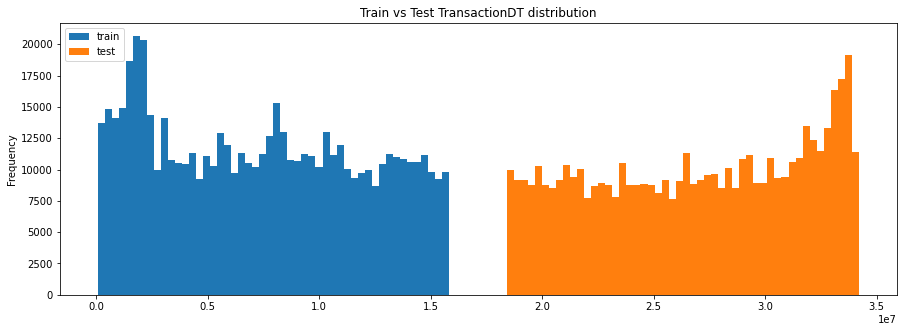

In [10]:
train_transaction['TransactionDT'].plot(kind='hist',
                                        figsize=(15, 5),
                                        label='train',
                                        bins=50,
                                        title='Train vs Test TransactionDT distribution')
test_transaction['TransactionDT'].plot(kind='hist',
                                       label='test',
                                       bins=50)
plt.legend()
plt.show()

In [11]:
train = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)

# Data exploration

# * By Fraud, By ProductCD, By DeviceType

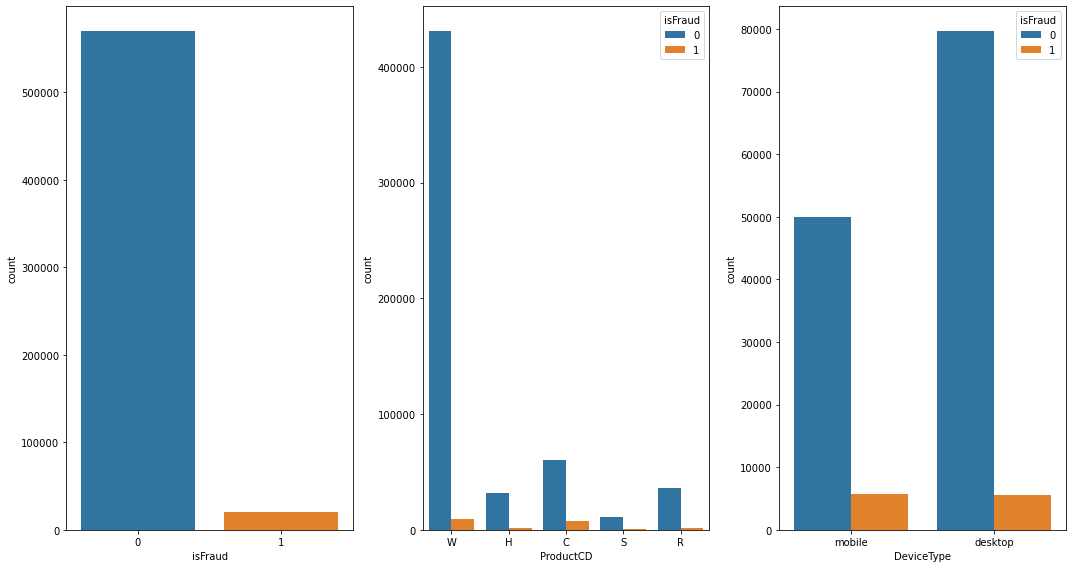

In [12]:
f, axes = plt.subplots(1, 3, figsize=(15, 8))
isFraud = sns.countplot(x='isFraud', data=train, ax=axes[0])
ProductCD = sns.countplot(x='ProductCD', hue="isFraud", data=train, ax=axes[1])
DeviceType = sns.countplot(x='DeviceType', hue="isFraud", data=train, ax=axes[2])
plt.tight_layout()

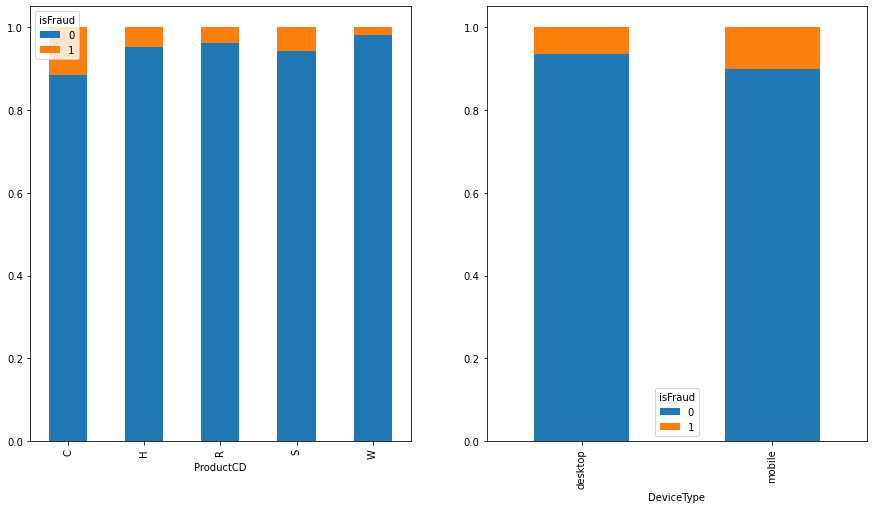

In [13]:
f, axes = plt.subplots(1, 2, figsize=(15, 8))

props = train.groupby("ProductCD")['isFraud'].value_counts(normalize=True).unstack()
p = props.plot(kind='bar', stacked='True', ax=axes[0])

props = train.groupby("DeviceType")['isFraud'].value_counts(normalize=True).unstack()
p = props.plot(kind='bar', stacked='True', ax=axes[1])

# Fraud Detections by OS

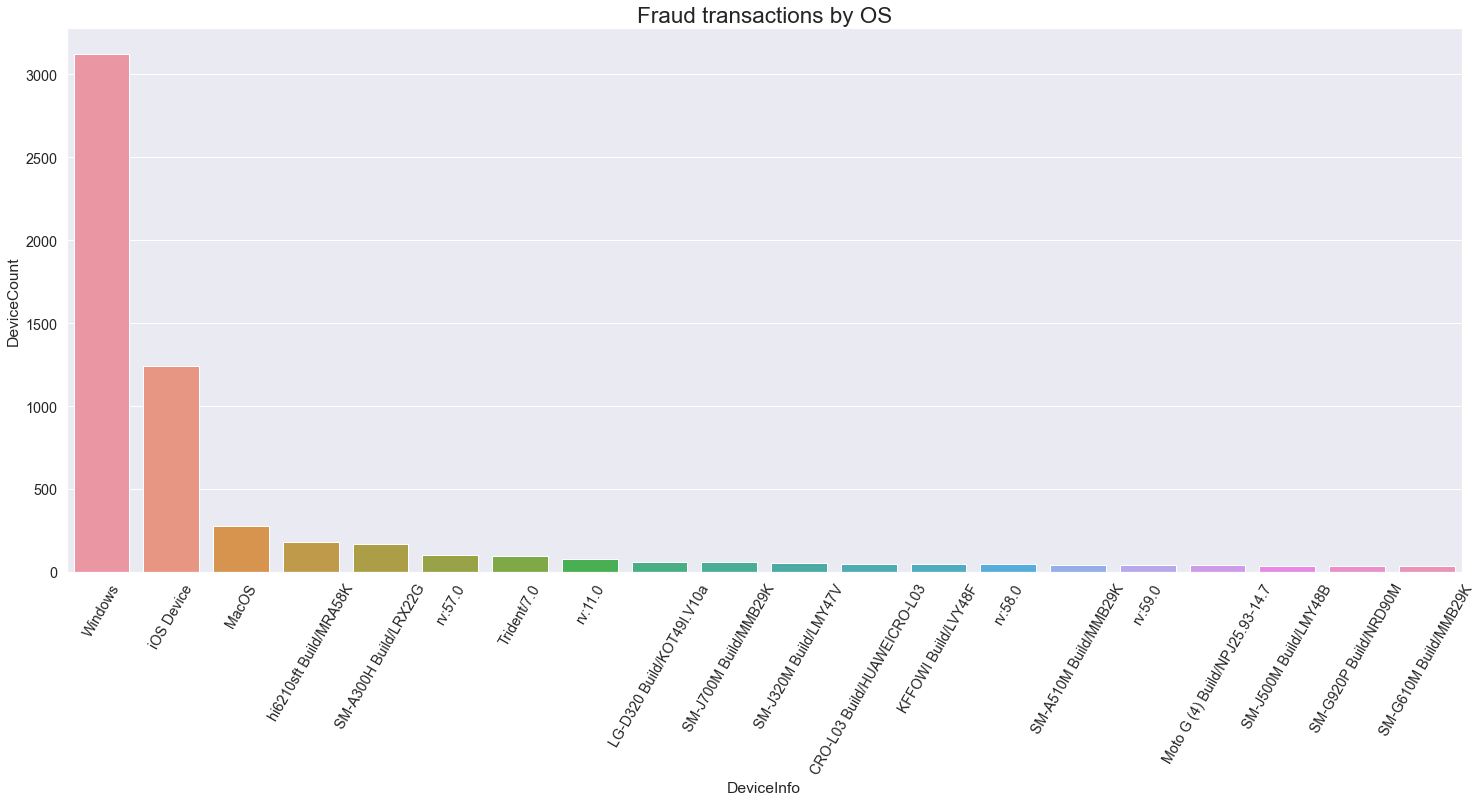

In [14]:
# Subset dataframe
fraud = pd.DataFrame()
is_fraud = train[train['isFraud']==1]
fraud['DeviceCount'] = is_fraud.groupby(['DeviceInfo'])['DeviceInfo'].count()
fraud['DeviceInfo'] = fraud.index

# There are too many Devices, so we will subset the top 20
group_top = fraud.sort_values(by='DeviceCount',ascending=False).head(20)

plt.figure(figsize=(25, 10))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x="DeviceInfo", y="DeviceCount", data=group_top)

font_size= {'size': 'x-large'}
ax.set_title("Fraud transactions by OS", **font_size)
xt = plt.xticks(rotation=60)

# # Fraud Detection by Card type

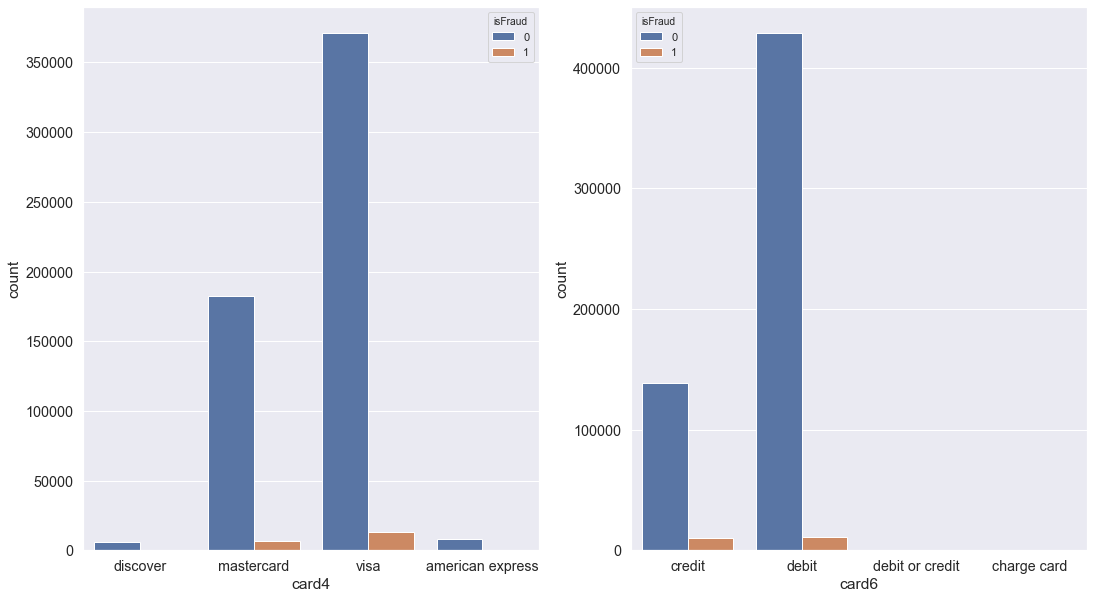

In [15]:
f, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.set(color_codes=True)
card4 = sns.countplot(x='card4', hue="isFraud", data=train, ax=axes[0])
card6 = sns.countplot(x='card6', hue="isFraud", data=train, ax=axes[1])

# Data exploration
1. Missing data
2. Imbalance data

In [16]:
train.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [17]:
test.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 2987000 to 3577539
Columns: 433 entries, isFraud to DeviceInfo
dtypes: float64(399), int64(3), object(31)
memory usage: 1.9+ GB


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506691 entries, 3663549 to 4170239
Columns: 432 entries, TransactionDT to DeviceInfo
dtypes: float64(399), int64(2), object(31)
memory usage: 1.7+ GB


# Unbalance Target 

Text(0.5, 1.0, 'Target variable count')

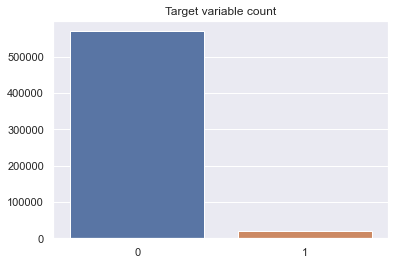

In [20]:
x=train_transaction['isFraud'].value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')

As we can see above, the target variable is imbalance class. Therefore, If we apply machine learning method before preprocessing data, the result will be heavily affected by the overwhelming one.

Change the performance metric

As we saw above, accuracy is not the best metric to use when evaluating imbalanced datasets as it can be very misleading. Metrics that can provide better insight include:

Confusion Matrix: a table showing correct predictions and types of incorrect predictions.

Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.

Recall: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.

F1 Score: the weighted average of precision and recall.

# Missing values

In [21]:
del train_identity, train_transaction, test_identity, test_transaction

In [22]:
print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')

There are 414 columns in train dataset with missing values.


In [23]:
one_value_cols = [col for col in train.columns if train[col].nunique() <= 1]
one_value_cols_test = [col for col in test.columns if test[col].nunique() <= 1]
one_value_cols == one_value_cols_test

False

In [24]:
print(f'There are {len(one_value_cols)} columns in train dataset with one unique value.')
print(f'There are {len(one_value_cols_test)} columns in test dataset with one unique value.')

There are 0 columns in train dataset with one unique value.
There are 1 columns in test dataset with one unique value.


In [25]:
many_null_cols = [col for col in train.columns if train[col].isnull().sum() / train.shape[0] > 0.9]
many_null_cols_test = [col for col in test.columns if test[col].isnull().sum() / test.shape[0] > 0.9]
print(many_null_cols)

['dist2', 'D7', 'id_07', 'id_08', 'id_18', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27']


In [26]:
big_top_value_cols = [col for col in train.columns if train[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
big_top_value_cols_test = [col for col in test.columns if test[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
print(big_top_value_cols)

['isFraud', 'dist2', 'C3', 'D7', 'V98', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V129', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V281', 'V284', 'V286', 'V290', 'V293', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V305', 'V309', 'V311', 'V316', 'V318', 'V319', 'V320', 'V321', 'id_07', 'id_08', 'id_18', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27']


In [27]:
cols_to_drop = list(set(many_null_cols + many_null_cols_test + big_top_value_cols + big_top_value_cols_test + one_value_cols+ one_value_cols_test))
cols_to_drop.remove('isFraud')
print(cols_to_drop)
len(cols_to_drop)

['V103', 'V320', 'V284', 'V134', 'V24', 'V98', 'id_26', 'V105', 'V109', 'V309', 'dist2', 'V55', 'V311', 'V133', 'V286', 'V107', 'V66', 'V124', 'V305', 'V116', 'V281', 'V319', 'V65', 'V28', 'V89', 'V117', 'V118', 'V114', 'V136', 'V290', 'V23', 'V132', 'id_18', 'V120', 'id_27', 'V68', 'V137', 'id_23', 'id_24', 'V102', 'V113', 'id_21', 'V88', 'id_25', 'V295', 'V101', 'V77', 'id_08', 'id_22', 'V296', 'V321', 'V301', 'V318', 'V129', 'V119', 'V26', 'V316', 'V135', 'V297', 'V125', 'V121', 'V298', 'D7', 'C3', 'V122', 'V27', 'V25', 'V299', 'V115', 'V106', 'V104', 'V110', 'V14', 'V300', 'V86', 'V111', 'V112', 'V293', 'V67', 'id_07', 'V108', 'V123']


82

In [28]:
train_data = train.drop(cols_to_drop, axis=1)
test_data = test.drop(cols_to_drop, axis=1)

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 2987000 to 3577539
Columns: 351 entries, isFraud to DeviceInfo
dtypes: float64(319), int64(3), object(29)
memory usage: 1.6+ GB


In [30]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506691 entries, 3663549 to 4170239
Columns: 350 entries, TransactionDT to DeviceInfo
dtypes: float64(319), int64(2), object(29)
memory usage: 1.3+ GB


In [31]:
X = train_data.loc[:, train_data.columns != 'isFraud' ]
y = train_data.loc[:, train_data.columns == 'isFraud' ]

# Encoding data

In [32]:
## Label Encoding
for f in train_data.columns:
    if train_data[f].dtype=='object' or train_data[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_data[f].values) + list(test_data[f].values))
        train_data[f] = lbl.transform(list(train_data[f].values))
        test_data[f] = lbl.transform(list(test_data[f].values))

In [33]:
y_train = train_data['isFraud'].copy()

# Drop target, fill in NaNs
X_train = train_data.drop('isFraud', axis=1)
X_test = test_data.copy()

del train, test

In [34]:
%%time
# From kernel https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
# WARNING! THIS CAN DAMAGE THE DATA 
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
X_train = reduce_mem_usage(X_train)
X_test = reduce_mem_usage(X_test)

Memory usage of dataframe is 1601.42 MB
Memory usage after optimization is: 443.51 MB
Decreased by 72.3%
Memory usage of dataframe is 1356.88 MB
Memory usage after optimization is: 371.11 MB
Decreased by 72.6%
Wall time: 4min 18s
Parser   : 483 ms


In [35]:
X_train.fillna(-999,inplace=True)
X_test.fillna(-999,inplace=True)
X_train.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,86400,68.5,4,13926,-999.0,150.0,1,142.0,1,315.0,...,136,-999.0,461,4,2,2,2,2,2,2740
2987001,86401,29.0,4,2755,404.0,150.0,2,102.0,1,325.0,...,136,-999.0,461,4,2,2,2,2,2,2740
2987002,86469,59.0,4,4663,490.0,150.0,4,166.0,2,330.0,...,136,-999.0,461,4,2,2,2,2,2,2740
2987003,86499,50.0,4,18132,567.0,150.0,2,117.0,2,476.0,...,136,-999.0,461,4,2,2,2,2,2,2740
2987004,86506,50.0,1,4497,514.0,150.0,2,102.0,1,420.0,...,162,32.0,268,3,1,0,1,1,1,1565


# UnderSampling

In [36]:
rus = RandomUnderSampler(random_state = 0, sampling_strategy = 1.0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, stratify = y_resampled)

print("train_set size: {} - Class0: {}, Class1: {}".format( len(y_train), len(y_train[y_train == 0]), len(y_train[y_train == 1]) ))
print("test_set size: {} - Class0: {}, Class1: {}".format( len(y_test), len(y_test[y_test == 0]), len(y_test[y_test == 1]) ))

train_set size: 33060 - Class0: 16530, Class1: 16530
test_set size: 8266 - Class0: 4133, Class1: 4133


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(C=1000,class_weight= 'balanced', verbose=2)
logmodel.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\roger\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished


LogisticRegression(C=1000, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [38]:
predictions = logmodel.predict(X_test)

logistic_regresion= logmodel.score(X_test, y_test)
logistic_regresion

0.6873941446890879

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[3279  854]
 [1730 2403]]


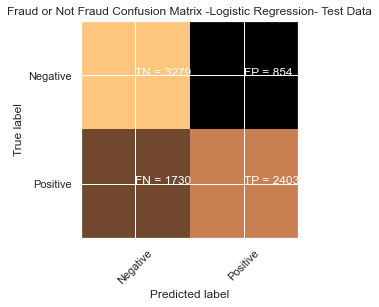

In [41]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.copper)
classNames = ['Negative','Positive']
plt.title('Fraud or Not Fraud Confusion Matrix -Logistic Regression- Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), color = 'white')
plt.show()

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.79      0.72      4133
           1       0.74      0.58      0.65      4133

    accuracy                           0.69      8266
   macro avg       0.70      0.69      0.68      8266
weighted avg       0.70      0.69      0.68      8266



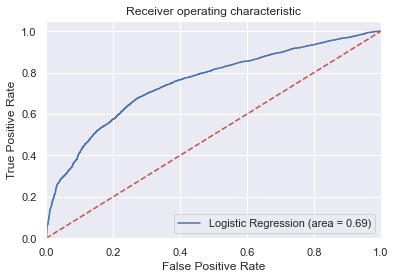

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Neural Network

# *Basic model, 6 layers

In [44]:
from keras import optimizers
baseline_model = keras.Sequential([
    keras.layers.Dense(output_dim = 128, init = 'uniform', activation = 'relu', input_dim = 350),
    keras.layers.Dense(output_dim = 128, init = 'uniform', activation = 'relu'),
    keras.layers.Dense(output_dim = 128, init = 'uniform', activation = 'relu'),
    keras.layers.Dense(output_dim = 128, init = 'uniform', activation = 'relu'),
    keras.layers.Dense(output_dim = 128, init = 'uniform', activation = 'relu'),
    keras.layers.Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid')
  ])

baseline_model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

C:\Users\roger\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=350, units=128, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\roger\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\roger\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128, kernel_initializer="uniform")`
  """
C:\Users\roger\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128, kernel_initializer="uniform")`
 

In [45]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 10 == 0: print('')
    print('.', end='')

b_history = baseline_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=100, verbose = 2, callbacks=[PrintDot()])

Train on 33060 samples, validate on 8266 samples
Epoch 1/30
 - 1s - loss: 3.1787 - accuracy: 0.5833 - val_loss: 0.6688 - val_accuracy: 0.6164

.Epoch 2/30
 - 1s - loss: 0.6535 - accuracy: 0.6370 - val_loss: 0.6382 - val_accuracy: 0.6394
.Epoch 3/30
 - 1s - loss: 0.6537 - accuracy: 0.6523 - val_loss: 0.6316 - val_accuracy: 0.6749
.Epoch 4/30
 - 1s - loss: 0.6308 - accuracy: 0.6642 - val_loss: 0.6123 - val_accuracy: 0.6954
.Epoch 5/30
 - 1s - loss: 0.6225 - accuracy: 0.6753 - val_loss: 0.6527 - val_accuracy: 0.6844
.Epoch 6/30
 - 1s - loss: 0.6336 - accuracy: 0.6665 - val_loss: 0.6020 - val_accuracy: 0.6953
.Epoch 7/30
 - 1s - loss: 0.6088 - accuracy: 0.6861 - val_loss: 0.6035 - val_accuracy: 0.7191
.Epoch 8/30
 - 1s - loss: 0.6100 - accuracy: 0.6850 - val_loss: 0.6384 - val_accuracy: 0.6218
.Epoch 9/30
 - 1s - loss: 0.5975 - accuracy: 0.6965 - val_loss: 0.5904 - val_accuracy: 0.6915
.Epoch 10/30
 - 1s - loss: 0.5979 - accuracy: 0.6930 - val_loss: 0.5803 - val_accuracy: 0.7028
.Epoch 11/

In [46]:
from sklearn.metrics import confusion_matrix
y_pred = baseline_model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
base_score=roc_auc_score(y_test, y_pred)
base_score

0.721872731671909

In [47]:
cm

array([[3597,  536],
       [1763, 2370]], dtype=int64)

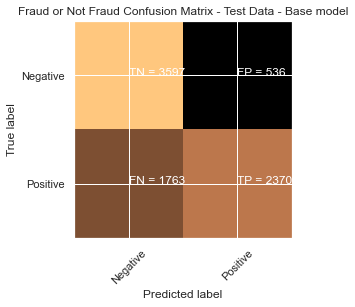

In [48]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.copper)
classNames = ['Negative','Positive']
plt.title('Fraud or Not Fraud Confusion Matrix - Test Data - Base model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), color = 'white')
plt.show()

In [49]:
 print(b_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


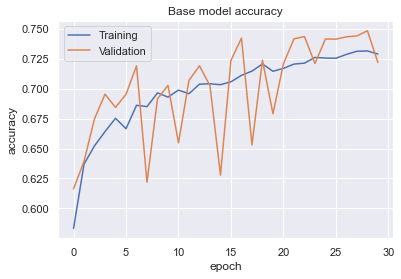

In [50]:
# summarize history for accuracy
plt.plot(b_history.history['accuracy'])
plt.plot(b_history.history['val_accuracy'])
plt.title('Base model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [51]:
def auc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [52]:
from sklearn.metrics import roc_curve,roc_auc_score
 
fpr , tpr , thresholds = roc_curve ( y_test , y_pred)

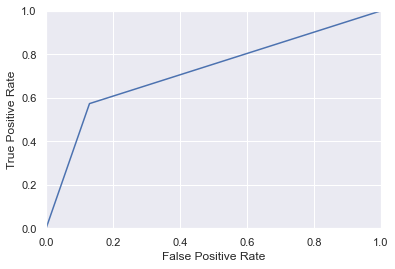

In [53]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr,tpr) 

In [54]:
auc_score=roc_auc_score( y_test , y_pred)

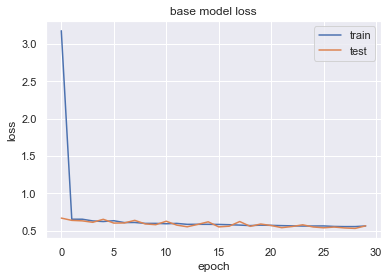

In [55]:
plt.plot(b_history.history['loss'])
plt.plot(b_history.history['val_loss'])
plt.title('base model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Improved Neural Network

# *Improved model 1:  Class weighted

In [130]:
from keras import optimizers
baseline_model = keras.Sequential([
    keras.layers.Dense(output_dim = 128, init = 'uniform', activation = 'relu', input_dim = 350),
    keras.layers.Dense(output_dim = 128, init = 'uniform', activation = 'relu'),
    #keras.layers.Dense(output_dim = 128, init = 'uniform', activation = 'relu'),
    keras.layers.Dense(output_dim = 128, init = 'uniform', activation = 'relu'),
    #keras.layers.Dense(output_dim = 128, init = 'uniform', activation = 'relu'),
    #keras.layers.Dense(output_dim = 128, init = 'uniform', activation = 'relu'),
    keras.layers.Dense(output_dim = 128, init = 'uniform', activation = 'relu'),    
    keras.layers.Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid')
  ])

baseline_model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

C:\Users\roger\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=350, units=128, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\roger\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\roger\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128, kernel_initializer="uniform")`
  
C:\Users\roger\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128, kernel_initializer="uniform")`
  if

In [131]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 10 == 0: print('')
    print('.', end='')
epochs =30
b_history_weighted = baseline_model.fit(X_train, y_train, validation_split=0.2,epochs=epochs, verbose=2,batch_size=100, class_weight={0:1, 1:2}, callbacks=[PrintDot()])

Train on 26448 samples, validate on 6612 samples
Epoch 1/30
 - 1s - loss: 32.0154 - accuracy: 0.5338 - val_loss: 1.7889 - val_accuracy: 0.5581

.Epoch 2/30
 - 1s - loss: 1.0484 - accuracy: 0.5810 - val_loss: 0.8468 - val_accuracy: 0.5676
.Epoch 3/30
 - 1s - loss: 1.7096 - accuracy: 0.5541 - val_loss: 0.9229 - val_accuracy: 0.5266
.Epoch 4/30
 - 1s - loss: 1.2128 - accuracy: 0.5600 - val_loss: 0.9398 - val_accuracy: 0.6801
.Epoch 5/30
 - 1s - loss: 0.9022 - accuracy: 0.5761 - val_loss: 0.8621 - val_accuracy: 0.6877
.Epoch 6/30
 - 1s - loss: 0.8907 - accuracy: 0.5782 - val_loss: 0.8873 - val_accuracy: 0.6871
.Epoch 7/30
 - 1s - loss: 0.8955 - accuracy: 0.5792 - val_loss: 0.8678 - val_accuracy: 0.5042
.Epoch 8/30
 - 1s - loss: 0.8903 - accuracy: 0.5800 - val_loss: 0.8385 - val_accuracy: 0.5492
.Epoch 9/30
 - 1s - loss: 0.8827 - accuracy: 0.5773 - val_loss: 0.8484 - val_accuracy: 0.6676
.Epoch 10/30
 - 1s - loss: 0.8739 - accuracy: 0.5926 - val_loss: 0.9926 - val_accuracy: 0.6895
.Epoch 11

In [132]:
y_pred = baseline_model.predict(X_test)
y_pred = (y_pred > 0.5)

In [133]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [134]:
base_weighted_score=roc_auc_score(y_test, y_pred)
base_weighted_score

0.7296152915557705

In [135]:
cm

array([[2805, 1328],
       [ 907, 3226]], dtype=int64)

In [136]:
 print(b_history_weighted.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


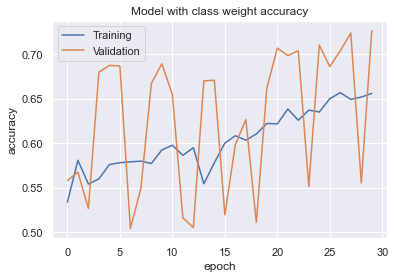

In [137]:
# summarize history for accuracy
plt.plot(b_history_weighted.history['accuracy'])
plt.plot(b_history_weighted.history['val_accuracy'])
plt.title('Model with class weight accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [138]:
def auc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [139]:
from sklearn.metrics import roc_curve,roc_auc_score
 
fpr , tpr , thresholds = roc_curve ( y_test , y_pred)

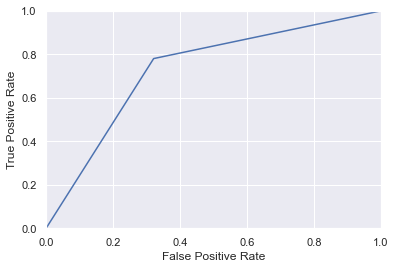

In [140]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr,tpr) 

In [141]:
auc_score=roc_auc_score( y_test , y_pred)

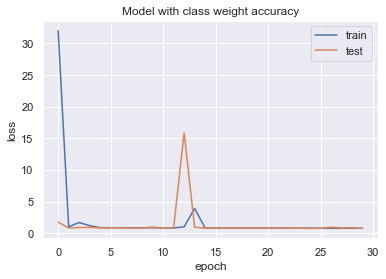

In [142]:
plt.plot(b_history_weighted.history['loss'])
plt.plot(b_history_weighted.history['val_loss'])
plt.title('Model with class weight accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

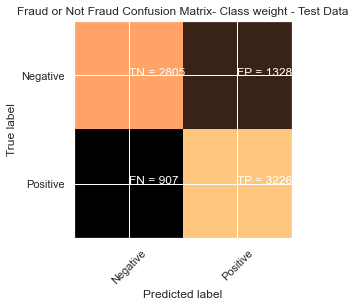

In [143]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.copper)
classNames = ['Negative','Positive']
plt.title('Fraud or Not Fraud Confusion Matrix- Class weight - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), color = 'white')
plt.show()

# Adding Normalization

In [70]:
sc=StandardScaler()
Xnor_train=sc.fit_transform(X_train)
Xnor_test=sc.transform(X_test)

In [121]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 10 == 0: print('')
    print('.', end='')

b_historycwn = baseline_model.fit(Xnor_train, y_train, validation_data=(Xnor_test,y_test),epochs=40,class_weight={0:1, 1:2}, verbose=2,batch_size=100, callbacks=[PrintDot()])

Train on 33060 samples, validate on 8266 samples
Epoch 1/40
 - 1s - loss: 0.5226 - accuracy: 0.8123 - val_loss: 0.4481 - val_accuracy: 0.7882

.Epoch 2/40
 - 1s - loss: 0.5163 - accuracy: 0.8174 - val_loss: 0.4916 - val_accuracy: 0.7662
.Epoch 3/40
 - 1s - loss: 0.5126 - accuracy: 0.8186 - val_loss: 0.4431 - val_accuracy: 0.7969
.Epoch 4/40
 - 1s - loss: 0.5107 - accuracy: 0.8184 - val_loss: 0.4458 - val_accuracy: 0.7976
.Epoch 5/40
 - 1s - loss: 0.5072 - accuracy: 0.8204 - val_loss: 0.4528 - val_accuracy: 0.7995
.Epoch 6/40
 - 1s - loss: 0.5043 - accuracy: 0.8222 - val_loss: 0.4310 - val_accuracy: 0.8069
.Epoch 7/40
 - 1s - loss: 0.5007 - accuracy: 0.8219 - val_loss: 0.4412 - val_accuracy: 0.8052
.Epoch 8/40
 - 1s - loss: 0.5004 - accuracy: 0.8220 - val_loss: 0.4350 - val_accuracy: 0.8034
.Epoch 9/40
 - 1s - loss: 0.4955 - accuracy: 0.8253 - val_loss: 0.4319 - val_accuracy: 0.8043
.Epoch 10/40
 - 1s - loss: 0.4915 - accuracy: 0.8263 - val_loss: 0.4634 - val_accuracy: 0.7877
.Epoch 11/

In [122]:
from sklearn.metrics import confusion_matrix
y_predbcwn = baseline_model.predict(Xnor_test)
y_predbcwn = (y_predbcwn > 0.5)
cmbcwn = confusion_matrix(y_test, y_predbcwn)
cmbcwn

array([[3239,  894],
       [ 683, 3450]], dtype=int64)

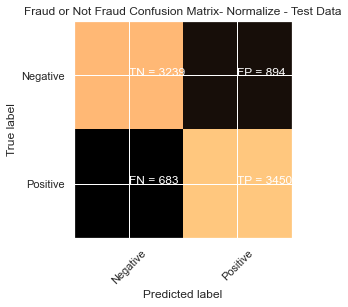

In [123]:
plt.clf()
plt.imshow(cmbcwn, interpolation='nearest', cmap=plt.cm.copper)
classNames = ['Negative','Positive']
plt.title('Fraud or Not Fraud Confusion Matrix- Normalize - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cmbcwn[i][j]), color = 'white')
plt.show()

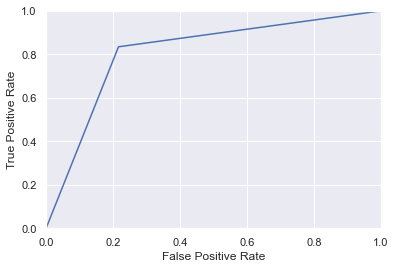

In [124]:
fprcwn , tprbcwn , thresholds = roc_curve ( y_test , y_predbcwn)
plot_roc_curve (fprcwn,tprbcwn) 


In [125]:
base_weighted_normalize_score=roc_auc_score( y_test , y_predbcwn)
base_weighted_normalize_score

0.8092184853617227

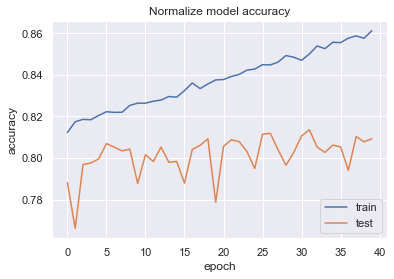

In [126]:
auc_score=roc_auc_score( y_test , y_predbcwn)
auc_score# summarize history for accuracy
plt.plot(b_historycwn.history['accuracy'])
plt.plot(b_historycwn.history['val_accuracy'])
plt.title('Normalize model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


# L1 & L2 Regularization

# *L1 Regularization

In [144]:
l1_model = keras.Sequential([
    Dense(output_dim = 128,  input_dim=350,init = 'uniform',use_bias = 'true',  activation = 'relu',kernel_regularizer=regularizers.l1(0.01)), 
    Dense(output_dim = 128,  input_dim=432,init = 'uniform',use_bias = 'true',  activation = 'relu',kernel_regularizer=regularizers.l1(0.01)), 
    Dense(output_dim = 128,  input_dim=432,init = 'uniform',use_bias = 'true',  activation = 'relu',kernel_regularizer=regularizers.l1(0.01)), 
    Dense(output_dim = 128,  input_dim=432,init = 'uniform',use_bias = 'true',  activation = 'relu',kernel_regularizer=regularizers.l1(0.01)), 
    Dense(output_dim = 128,  input_dim=432,init = 'uniform',use_bias = 'true',  activation = 'relu',kernel_regularizer=regularizers.l1(0.01)), 
    Dense(output_dim = 1,  input_dim=432,init = 'uniform',use_bias = 'true',   activation = 'sigmoid'),
      ])

l1_model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(0.002),
                metrics=['accuracy'])
 

C:\Users\roger\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=350, use_bias="true", activation="relu", kernel_regularizer=<keras.reg..., units=128, kernel_initializer="uniform")`
  
C:\Users\roger\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=432, use_bias="true", activation="relu", kernel_regularizer=<keras.reg..., units=128, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\roger\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=432, use_bias="true", activation="relu", kernel_regularizer=<keras.reg..., units=128, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\roger\anaconda3\envs\tenso

In [145]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 10 == 0: print('')
    print('.', end='')

l1cwn = l1_model.fit(Xnor_train, y_train, validation_data=(Xnor_test,y_test),epochs=30,class_weight={0:1, 1:2},batch_size = 100, verbose=2, callbacks=[PrintDot()])

Train on 33060 samples, validate on 8266 samples
Epoch 1/30
 - 1s - loss: 2.3388 - accuracy: 0.5001 - val_loss: 1.7352 - val_accuracy: 0.5000

.Epoch 2/30
 - 1s - loss: 1.9153 - accuracy: 0.5000 - val_loss: 1.6758 - val_accuracy: 0.5000
.Epoch 3/30
 - 1s - loss: 1.9165 - accuracy: 0.5000 - val_loss: 1.7388 - val_accuracy: 0.5000
.Epoch 4/30
 - 1s - loss: 1.9173 - accuracy: 0.5000 - val_loss: 1.7088 - val_accuracy: 0.5000
.Epoch 5/30
 - 1s - loss: 1.9168 - accuracy: 0.5000 - val_loss: 1.7306 - val_accuracy: 0.5000
.Epoch 6/30
 - 1s - loss: 1.9101 - accuracy: 0.5000 - val_loss: 1.5893 - val_accuracy: 0.5000
.Epoch 7/30
 - 1s - loss: 1.7481 - accuracy: 0.5000 - val_loss: 1.5676 - val_accuracy: 0.5000
.Epoch 8/30
 - 1s - loss: 1.7433 - accuracy: 0.5000 - val_loss: 1.5114 - val_accuracy: 0.5000
.Epoch 9/30
 - 1s - loss: 1.7434 - accuracy: 0.5000 - val_loss: 1.5601 - val_accuracy: 0.5000
.Epoch 10/30
 - 1s - loss: 1.7435 - accuracy: 0.5000 - val_loss: 1.5268 - val_accuracy: 0.5000
.Epoch 11/

In [146]:
from sklearn.metrics import confusion_matrix
y_predl1 = l1_model.predict(Xnor_test)
y_predl1 = (y_predl1 > 0.5)
cml1 = confusion_matrix(y_test, y_predl1)
cml1

array([[   0, 4133],
       [   0, 4133]], dtype=int64)

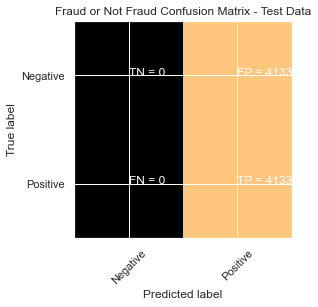

In [147]:
plt.clf()
plt.imshow(cml1, interpolation='nearest', cmap=plt.cm.copper)
classNames = ['Negative','Positive']
plt.title('Fraud or Not Fraud Confusion Matrix -L1 - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cml1[i][j]), color = 'white')
plt.show()

In [148]:
auc_scorel1=roc_auc_score( y_test, y_predl1)
auc_scorel1

0.5

# *L2 Regularization

In [77]:
l2_model = keras.Sequential([
    Dense(output_dim = 128,  input_dim=350,init = 'uniform',use_bias = 'true',  activation = 'relu',kernel_regularizer=regularizers.l2(0.01)), 
    Dense(output_dim = 128,  input_dim=432,init = 'uniform',use_bias = 'true',  activation = 'relu',kernel_regularizer=regularizers.l2(0.01)),
    Dense(output_dim = 128,  input_dim=432,init = 'uniform',use_bias = 'true',  activation = 'relu',kernel_regularizer=regularizers.l2(0.01)),
    Dense(output_dim = 128,  input_dim=432,init = 'uniform',use_bias = 'true',  activation = 'relu',kernel_regularizer=regularizers.l2(0.01)),
    Dense(output_dim = 128,  input_dim=432,init = 'uniform',use_bias = 'true',  activation = 'relu',kernel_regularizer=regularizers.l2(0.01)), 
    Dense(output_dim = 1,  input_dim=432,init = 'uniform',use_bias = 'true',   activation = 'sigmoid'),
      ])

l2_model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

C:\Users\roger\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=350, use_bias="true", activation="relu", kernel_regularizer=<keras.reg..., units=128, kernel_initializer="uniform")`
  
C:\Users\roger\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=432, use_bias="true", activation="relu", kernel_regularizer=<keras.reg..., units=128, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\roger\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=432, use_bias="true", activation="relu", kernel_regularizer=<keras.reg..., units=128, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\roger\anaconda3\envs\tenso

In [78]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 10 == 0: print('')
    print('.', end='')

l2cwnbs = l2_model.fit(Xnor_train, y_train, validation_data=(Xnor_test,y_test),epochs=30,class_weight={0:1, 1:2},batch_size = 100, verbose=2, callbacks=[PrintDot()])

Train on 33060 samples, validate on 8266 samples
Epoch 1/30
 - 1s - loss: 0.9365 - accuracy: 0.5460 - val_loss: 0.6989 - val_accuracy: 0.7227

.Epoch 2/30
 - 1s - loss: 0.8397 - accuracy: 0.6687 - val_loss: 0.6768 - val_accuracy: 0.7173
.Epoch 3/30
 - 1s - loss: 0.8212 - accuracy: 0.6892 - val_loss: 0.6217 - val_accuracy: 0.7406
.Epoch 4/30
 - 1s - loss: 0.8075 - accuracy: 0.6962 - val_loss: 0.6727 - val_accuracy: 0.6797
.Epoch 5/30
 - 1s - loss: 0.7986 - accuracy: 0.7057 - val_loss: 0.6341 - val_accuracy: 0.7282
.Epoch 6/30
 - 1s - loss: 0.7881 - accuracy: 0.7116 - val_loss: 0.6256 - val_accuracy: 0.7348
.Epoch 7/30
 - 1s - loss: 0.7795 - accuracy: 0.7172 - val_loss: 0.5931 - val_accuracy: 0.7394
.Epoch 8/30
 - 1s - loss: 0.7736 - accuracy: 0.7216 - val_loss: 0.6255 - val_accuracy: 0.7290
.Epoch 9/30
 - 1s - loss: 0.7716 - accuracy: 0.7204 - val_loss: 0.5953 - val_accuracy: 0.7378
.Epoch 10/30
 - 1s - loss: 0.7632 - accuracy: 0.7240 - val_loss: 0.6196 - val_accuracy: 0.7355
.Epoch 11/

In [79]:
y_predl2cwnbs  = l2_model.predict(Xnor_test)
y_predl2cwnbs  = (y_predl2cwnbs > 0.5)
cml2cwnbs = confusion_matrix(y_test, y_predl2cwnbs)
cml2cwnbs

array([[2952, 1181],
       [ 902, 3231]], dtype=int64)

In [80]:
cml2cwnbs_score=roc_auc_score(y_test, y_predl2cwnbs)
cml2cwnbs_score

0.748003871279942

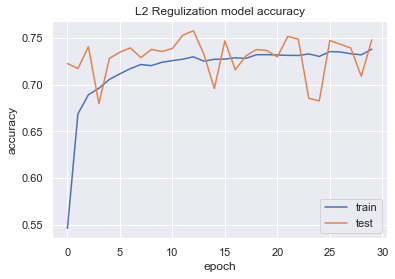

In [81]:
auc_score=roc_auc_score( y_test , y_predl2cwnbs)
auc_score# summarize history for accuracy
plt.plot(l2cwnbs.history['accuracy'])
plt.plot(l2cwnbs.history['val_accuracy'])
plt.title('L2 Regulization model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


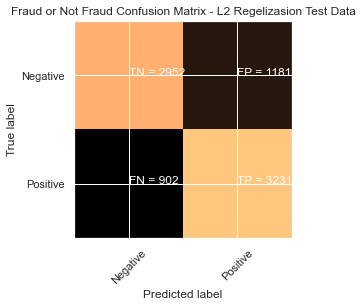

In [82]:
plt.clf()
plt.imshow(cml2cwnbs, interpolation='nearest', cmap=plt.cm.copper)
classNames = ['Negative','Positive']
plt.title('Fraud or Not Fraud Confusion Matrix - L2 Regelizasion Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cml2cwnbs[i][j]), color = 'white')
plt.show()

# Adding Momentum 

In [83]:
baseline_modelsgdmm = keras.Sequential([
    keras.layers.Dense(output_dim = 128, init = 'uniform', activation = 'relu', input_dim = 350),
    keras.layers.Dense(output_dim = 128, init = 'uniform', activation = 'relu'),
    keras.layers.Dense(output_dim = 128, init = 'uniform', activation = 'relu'),
    keras.layers.Dense(output_dim = 128, init = 'uniform', activation = 'relu'),    
    keras.layers.Dense(output_dim = 128, init = 'uniform', activation = 'relu'),    
    keras.layers.Dense(output_dim = 128, init = 'uniform', activation = 'relu'),        
    keras.layers.Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid')
  ])

baseline_modelsgdmm.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.SGD(lr=0.01, nesterov=True,momentum=0.9),
                metrics=['accuracy'])

C:\Users\roger\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=350, units=128, kernel_initializer="uniform")`
  
C:\Users\roger\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\roger\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\roger\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128, kernel_initializer="uniform")`
  ""

In [84]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 10 == 0: print('')
    print('.', end='')

baselinesgdmm = baseline_modelsgdmm.fit(Xnor_train, y_train, validation_data=(Xnor_test,y_test),epochs=30,class_weight={0:1, 1:2},batch_size = 100, verbose=2, callbacks=[PrintDot()])

Train on 33060 samples, validate on 8266 samples
Epoch 1/30
 - 1s - loss: 0.9594 - accuracy: 0.5002 - val_loss: 0.7522 - val_accuracy: 0.5000

.Epoch 2/30
 - 1s - loss: 0.9547 - accuracy: 0.5000 - val_loss: 0.7531 - val_accuracy: 0.5000
.Epoch 3/30
 - 1s - loss: 0.9544 - accuracy: 0.5000 - val_loss: 0.7520 - val_accuracy: 0.5000
.Epoch 4/30
 - 1s - loss: 0.9501 - accuracy: 0.5000 - val_loss: 0.7271 - val_accuracy: 0.5000
.Epoch 5/30
 - 1s - loss: 0.8386 - accuracy: 0.5654 - val_loss: 0.5700 - val_accuracy: 0.7314
.Epoch 6/30
 - 1s - loss: 0.7379 - accuracy: 0.7085 - val_loss: 0.5480 - val_accuracy: 0.7241
.Epoch 7/30
 - 1s - loss: 0.7088 - accuracy: 0.7242 - val_loss: 0.5107 - val_accuracy: 0.7516
.Epoch 8/30
 - 1s - loss: 0.6912 - accuracy: 0.7363 - val_loss: 0.5555 - val_accuracy: 0.7331
.Epoch 9/30
 - 1s - loss: 0.6813 - accuracy: 0.7427 - val_loss: 0.5763 - val_accuracy: 0.6942
.Epoch 10/30
 - 1s - loss: 0.6723 - accuracy: 0.7457 - val_loss: 0.5407 - val_accuracy: 0.7302
.Epoch 11/

In [85]:
y_predbaselinesgdmm  = baseline_modelsgdmm.predict(Xnor_test)
y_predbaselinesgdmm  = (y_predbaselinesgdmm > 0.5)
cmbaselinesgdmm  = confusion_matrix(y_test, y_predbaselinesgdmm)
cmbaselinesgdmm 

array([[2622, 1511],
       [ 430, 3703]], dtype=int64)

In [86]:
sgdmm_score=roc_auc_score( y_test, y_predbaselinesgdmm)
sgdmm_score

0.7651826760222599

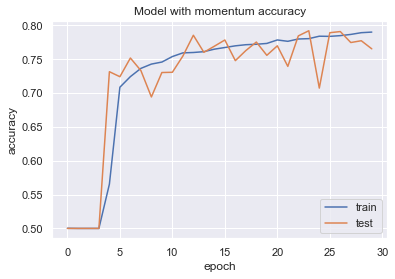

In [87]:
auc_score=roc_auc_score( y_test , y_predbaselinesgdmm)
auc_score# summarize history for accuracy
plt.plot(baselinesgdmm.history['accuracy'])
plt.plot(baselinesgdmm.history['val_accuracy'])
plt.title('Model with momentum accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


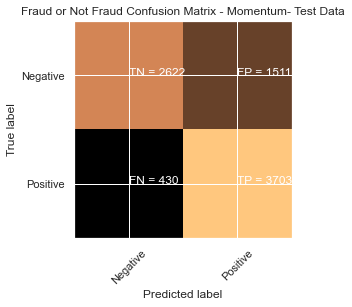

In [88]:
plt.clf()
plt.imshow(cmbaselinesgdmm, interpolation='nearest', cmap=plt.cm.copper)
classNames = ['Negative','Positive']
plt.title('Fraud or Not Fraud Confusion Matrix - Momentum- Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cmbaselinesgdmm[i][j]), color = 'white')
plt.show()

# Comparisons

In [149]:
from collections import OrderedDict

In [150]:
summary = OrderedDict({'Logistic regression' : logistic_regresion,
           'Baseline accuracy' : base_score,
           'Baseline_weighted accuracy': base_weighted_score,
           'Baseline_weighted_normalize accuracy' : base_weighted_normalize_score,
           'L1 model': auc_scorel1,
           'L2 model' : cml2cwnbs_score,
           'Momentum added model' : sgdmm_score        
          })

summary_df = pd.DataFrame([summary])
summary_df.style.format("{:,.4f}")


,Logistic regression,Baseline accuracy,Baseline_weighted accuracy,Baseline_weighted_normalize accuracy,L1 model,L2 model,Momentum added model
0,0.6874,0.7219,0.7296,0.8092,0.5000,0.7480,0.7652


###### Conclution: Neural network baseline with weighted class and normalization provide the best score : 80.92% of accuracy